<center><h1>Shrey_Shah_HW5</h1></center>

Name: Shrey Shah<br>Github Username: shreyshah97<br>USC ID: 5061063668

## 1. Decision Trees as Interpretable Models

Import packages

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import statsmodels.api as sm

from sklearn import tree
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression , RidgeCV , LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import _tree, DecisionTreeClassifier
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")

### (a) Obtain Data

Get the Accute Inamations Data Set

In [2]:
FILEPATH = '../data/diagnosis.data'
dataframe = pd.read_csv(FILEPATH, encoding='utf-16', sep='\t', names=['Temperature','Nausea','Lumbar','Urine','Micturition','Urethra','Inflammation','Nephritis'], decimal=",")
dataframe

,Temperature,Nausea,Lumbar,Urine,Micturition,Urethra,Inflammation,Nephritis
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no
...,...,...,...,...,...,...,...,...
115,41.4,no,yes,yes,no,yes,no,yes
116,41.5,no,no,no,no,no,no,no
117,41.5,yes,yes,no,yes,no,no,yes
118,41.5,no,yes,yes,no,yes,no,yes


### (b) Build a decision tree

In [3]:
dataframe = dataframe.replace({'yes': 1, 'no': 0})
df_x = dataframe.iloc[:, 0 :6]
df_y = dataframe.iloc[:, -2 :]
model = tree.DecisionTreeClassifier(random_state = 69)
_ = model.fit(df_x, df_y)

[Text(0.4, 0.9, 'x[0] <= 37.95\ngini = 0.493\nsamples = 120\nvalue = [[61, 59]\n[70, 50]]'),
 Text(0.2, 0.7, 'x[3] <= 0.5\ngini = 0.222\nsamples = 60\nvalue = [[20, 40]\n[60, 0]]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 20\nvalue = [[20, 0]\n[20, 0]]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [[0, 40]\n[40, 0]]'),
 Text(0.6, 0.7, 'x[2] <= 0.5\ngini = 0.355\nsamples = 60\nvalue = [[41, 19]\n[10, 50]]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[10, 0]]'),
 Text(0.7, 0.5, 'x[4] <= 0.5\ngini = 0.236\nsamples = 50\nvalue = [[31, 19]\n[0, 50]]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 21\nvalue = [[21, 0]\n[0, 21]]'),
 Text(0.8, 0.3, 'x[3] <= 0.5\ngini = 0.226\nsamples = 29\nvalue = [[10, 19]\n[0, 29]]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[0, 10]]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 19\nvalue = [[0, 19]\n[0, 19]]')]

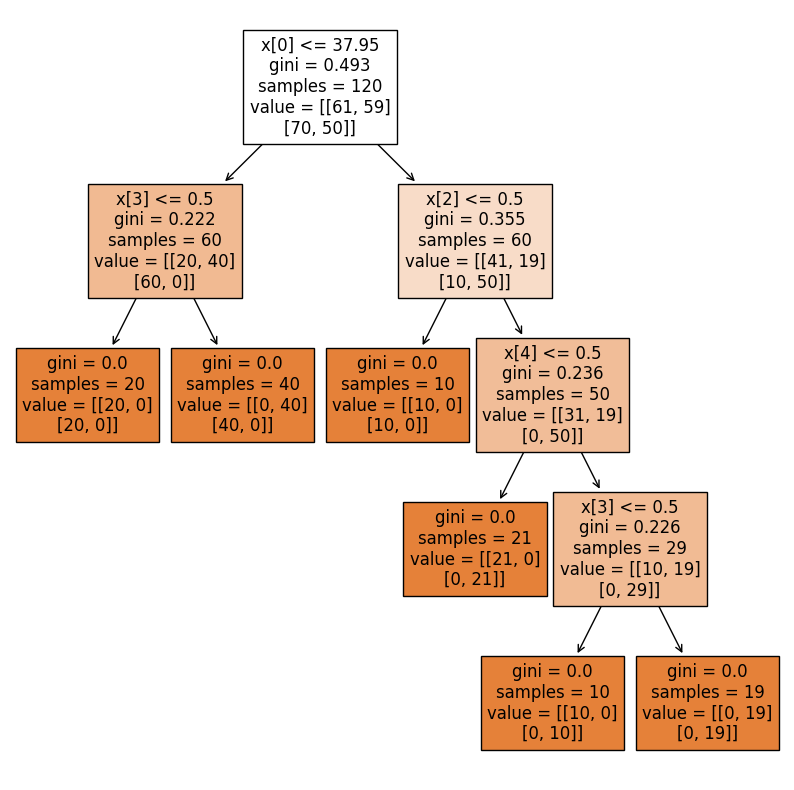

In [4]:
plt.figure(figsize = (10,10))
tree.plot_tree(model, filled = True)

### (c) Convert the decision rules

In [5]:
tree_ = model.tree_
feature_name = [
    df_x.columns[i] if i != _tree.TREE_UNDEFINED else "undefined!"
    for i in tree_.feature
]
print("def tree({}):".format(", ".join(df_x.columns)))

def recurse(node, depth):
    indent = "  " * depth
    if tree_.feature[node] != _tree.TREE_UNDEFINED:
        name = feature_name[node]
        threshold = tree_.threshold[node]
        print("{}if {} <= {}:".format(indent, name, threshold))
        recurse(tree_.children_left[node], depth + 1)
        print("{}else:  # if {} > {}".format(indent, name, threshold))
        recurse(tree_.children_right[node], depth + 1)
    else:
        print("{}return [{}\n\t{}{}]".format(indent, tree_.value[node][0], indent, tree_.value[node][1]))

recurse(0, 1)

def tree(Temperature, Nausea, Lumbar, Urine, Micturition, Urethra):
  if Temperature <= 37.95000076293945:
    if Urine <= 0.5:
      return [[20.  0.]
	      [20.  0.]]
    else:  # if Urine > 0.5
      return [[ 0. 40.]
	      [40.  0.]]
  else:  # if Temperature > 37.95000076293945
    if Lumbar <= 0.5:
      return [[10.  0.]
	      [10.  0.]]
    else:  # if Lumbar > 0.5
      if Micturition <= 0.5:
        return [[21.  0.]
	        [ 0. 21.]]
      else:  # if Micturition > 0.5
        if Urine <= 0.5:
          return [[10.  0.]
	          [ 0. 10.]]
        else:  # if Urine > 0.5
          return [[ 0. 19.]
	          [ 0. 19.]]


### (d) Cost complexity pruning

Best ccp alpha value:  0.0


[Text(0.4, 0.9, 'x[0] <= 37.95\ngini = 0.493\nsamples = 120\nvalue = [[61, 59]\n[70, 50]]'),
 Text(0.2, 0.7, 'x[3] <= 0.5\ngini = 0.222\nsamples = 60\nvalue = [[20, 40]\n[60, 0]]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 20\nvalue = [[20, 0]\n[20, 0]]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [[0, 40]\n[40, 0]]'),
 Text(0.6, 0.7, 'x[2] <= 0.5\ngini = 0.355\nsamples = 60\nvalue = [[41, 19]\n[10, 50]]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[10, 0]]'),
 Text(0.7, 0.5, 'x[4] <= 0.5\ngini = 0.236\nsamples = 50\nvalue = [[31, 19]\n[0, 50]]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 21\nvalue = [[21, 0]\n[0, 21]]'),
 Text(0.8, 0.3, 'x[3] <= 0.5\ngini = 0.226\nsamples = 29\nvalue = [[10, 19]\n[0, 29]]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[0, 10]]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 19\nvalue = [[0, 19]\n[0, 19]]')]

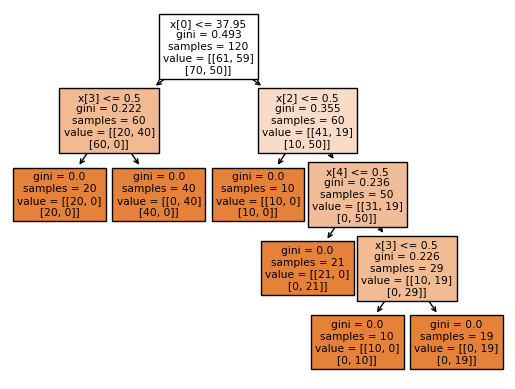

In [6]:
my_classifier = DecisionTreeClassifier(random_state = 69)
path = my_classifier.cost_complexity_pruning_path(df_x, df_y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

tree_model = DecisionTreeClassifier(random_state = 69)
tree_cv = GridSearchCV(tree_model, cv = 5, param_grid={'ccp_alpha': ccp_alphas}, scoring='neg_mean_squared_error')
tree_cv.fit(df_x, df_y)
print("Best ccp alpha value: ", tree_cv.best_params_['ccp_alpha'])
minimal_tree_model = DecisionTreeClassifier(random_state = 69, ccp_alpha = tree_cv.best_params_['ccp_alpha'])
_ = minimal_tree_model.fit(df_x, df_y)
tree.plot_tree(minimal_tree_model, filled = True)

In [7]:
tree_ = minimal_tree_model.tree_
feature_name = [
    df_x.columns[i] if i != _tree.TREE_UNDEFINED else "undefined!"
    for i in tree_.feature
]

print("def tree({}):".format(", ".join(df_x.columns)))

def recurse(node, depth):
    indent = "  " * depth
    if tree_.feature[node] != _tree.TREE_UNDEFINED:
        name = feature_name[node]
        threshold = tree_.threshold[node]
        print("{}if {} <= {}:".format(indent, name, threshold))
        recurse(tree_.children_left[node], depth + 1)
        print("{}else:  # if {} > {}".format(indent, name, threshold))
        recurse(tree_.children_right[node], depth + 1)
    else:
        print("{}return [{}\n\t{}{}]".format(indent, tree_.value[node][0], indent, tree_.value[node][1]))

recurse(0, 1)

def tree(Temperature, Nausea, Lumbar, Urine, Micturition, Urethra):
  if Temperature <= 37.95000076293945:
    if Urine <= 0.5:
      return [[20.  0.]
	      [20.  0.]]
    else:  # if Urine > 0.5
      return [[ 0. 40.]
	      [40.  0.]]
  else:  # if Temperature > 37.95000076293945
    if Lumbar <= 0.5:
      return [[10.  0.]
	      [10.  0.]]
    else:  # if Lumbar > 0.5
      if Micturition <= 0.5:
        return [[21.  0.]
	        [ 0. 21.]]
      else:  # if Micturition > 0.5
        if Urine <= 0.5:
          return [[10.  0.]
	          [ 0. 10.]]
        else:  # if Urine > 0.5
          return [[ 0. 19.]
	          [ 0. 19.]]


## 2. The LASSO and Boosting for Regression

### (a) Obtain Data

In [8]:
FILEPATH = '../data/communities.data'
dataframe = pd.read_csv(FILEPATH, names=['state','county','community','communityname','fold','population','householdsize','racepctblack','racePctWhite','racePctAsian','racePctHisp','agePct12t21','agePct12t29','agePct16t24','agePct65up','numbUrban','pctUrban','medIncome','pctWWage','pctWFarmSelf','pctWInvInc','pctWSocSec','pctWPubAsst','pctWRetire','medFamInc','perCapInc','whitePerCap','blackPerCap','indianPerCap','AsianPerCap','OtherPerCap','HispPerCap','NumUnderPov','PctPopUnderPov','PctLess9thGrade','PctNotHSGrad','PctBSorMore','PctUnemployed','PctEmploy','PctEmplManu','PctEmplProfServ','PctOccupManu','PctOccupMgmtProf','MalePctDivorce','MalePctNevMarr','FemalePctDiv','TotalPctDiv','PersPerFam','PctFam2Par','PctKids2Par','PctYoungKids2Par','PctTeen2Par','PctWorkMomYoungKids','PctWorkMom','NumIlleg','PctIlleg','NumImmig','PctImmigRecent','PctImmigRec5','PctImmigRec8','PctImmigRec10','PctRecentImmig','PctRecImmig5','PctRecImmig8','PctRecImmig10','PctSpeakEnglOnly','PctNotSpeakEnglWell','PctLargHouseFam','PctLargHouseOccup','PersPerOccupHous','PersPerOwnOccHous','PersPerRentOccHous','PctPersOwnOccup','PctPersDenseHous','PctHousLess3BR','MedNumBR','HousVacant','PctHousOccup','PctHousOwnOcc','PctVacantBoarded','PctVacMore6Mos','MedYrHousBuilt','PctHousNoPhone','PctWOFullPlumb','OwnOccLowQuart','OwnOccMedVal','OwnOccHiQuart','RentLowQ','RentMedian','RentHighQ','MedRent','MedRentPctHousInc','MedOwnCostPctInc','MedOwnCostPctIncNoMtg','NumInShelters','NumStreet','PctForeignBorn','PctBornSameState','PctSameHouse85','PctSameCity85','PctSameState85','LemasSwornFT','LemasSwFTPerPop','LemasSwFTFieldOps','LemasSwFTFieldPerPop','LemasTotalReq','LemasTotReqPerPop','PolicReqPerOffic','PolicPerPop','RacialMatchCommPol','PctPolicWhite','PctPolicBlack','PctPolicHisp','PctPolicAsian','PctPolicMinor','OfficAssgnDrugUnits','NumKindsDrugsSeiz','PolicAveOTWorked','LandArea','PopDens','PctUsePubTrans','PolicCars','PolicOperBudg','LemasPctPolicOnPatr','LemasGangUnitDeploy','LemasPctOfficDrugUn','PolicBudgPerPop','ViolentCrimesPerPop'], na_values="?")
df_train = dataframe[:1495]
df_test = dataframe[1495:]

### (b) Missing values

In [9]:
df_train = df_train.iloc[:, 5:]
df_test = df_test.iloc[:, 5:]

#Using mean to replace the NaN values
imputer = SimpleImputer(missing_values = np.nan, strategy='mean')
imputer.fit(df_train)
df_train = pd.DataFrame(imputer.transform(df_train), columns = df_train.columns)

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df_test)
df_test = pd.DataFrame(imputer.transform(df_test), columns = df_test.columns)

### (c) Plot a correlation matrix

In [10]:
df_combined = pd.concat([df_train, df_test], ignore_index=True)
correlation_matrix = df_combined.corr()
correlation_matrix.style.background_gradient(cmap = 'seismic')

<Axes: >

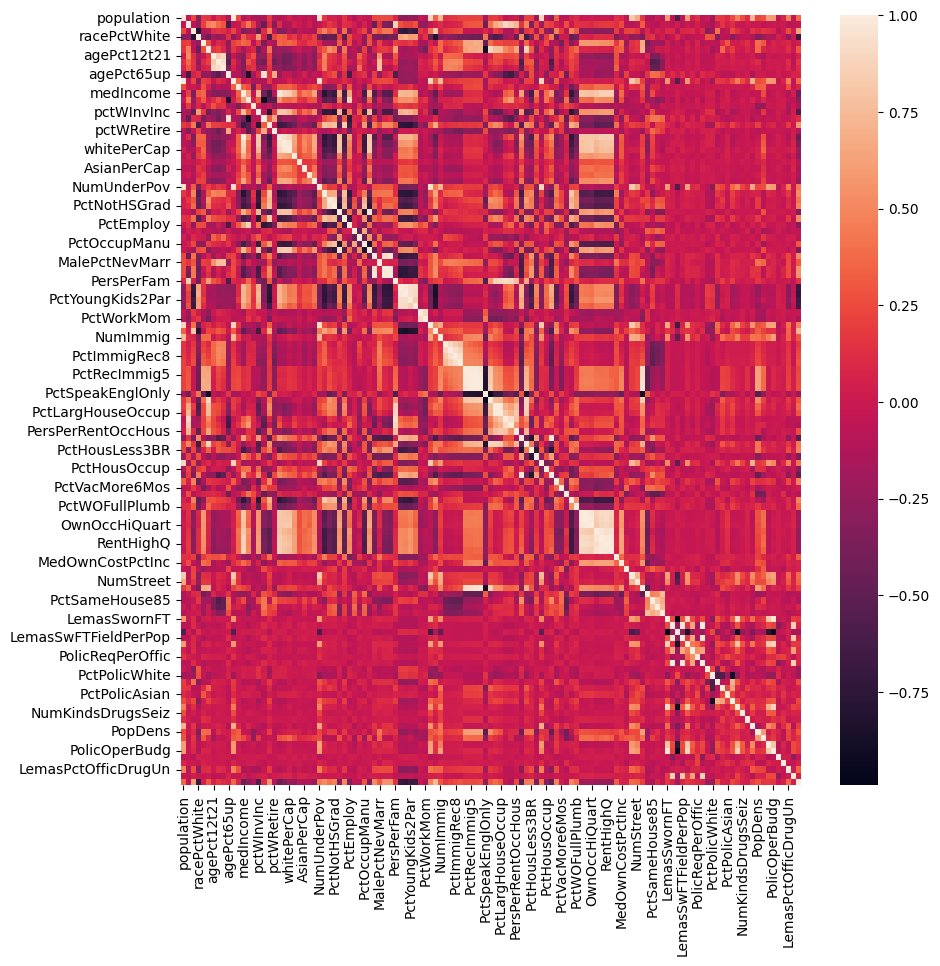

In [11]:
plt.figure(figsize=(10,10))
sb.heatmap(correlation_matrix)

### (d) Calculate the Coefficient of Variation CV

In [12]:
summary = df_combined.describe()
CV = summary.loc['std']/summary.loc['mean']
CV

population             2.203503
householdsize          0.353298
racepctblack           1.410920
racePctWhite           0.323782
racePctAsian           1.359162
                         ...   
LemasPctPolicOnPatr    0.126642
LemasGangUnitDeploy    0.370311
LemasPctOfficDrugUn    2.555266
PolicBudgPerPop        0.339119
ViolentCrimesPerPop    0.979015
Length: 123, dtype: float64

### (e) Scatter plots and box plots for highest CV features

In [13]:
total_features = math.floor(math.sqrt(128))
top_CV = CV.sort_values(ascending = False)[:total_features]
top_CV

NumStreet              4.407702
NumInShelters          3.485481
NumIlleg               2.994196
NumImmig               2.900497
LemasPctOfficDrugUn    2.555266
NumUnderPov            2.304970
population             2.203503
numbUrban              2.001744
HousVacant             1.958780
LandArea               1.678031
racePctHisp            1.614278
dtype: float64

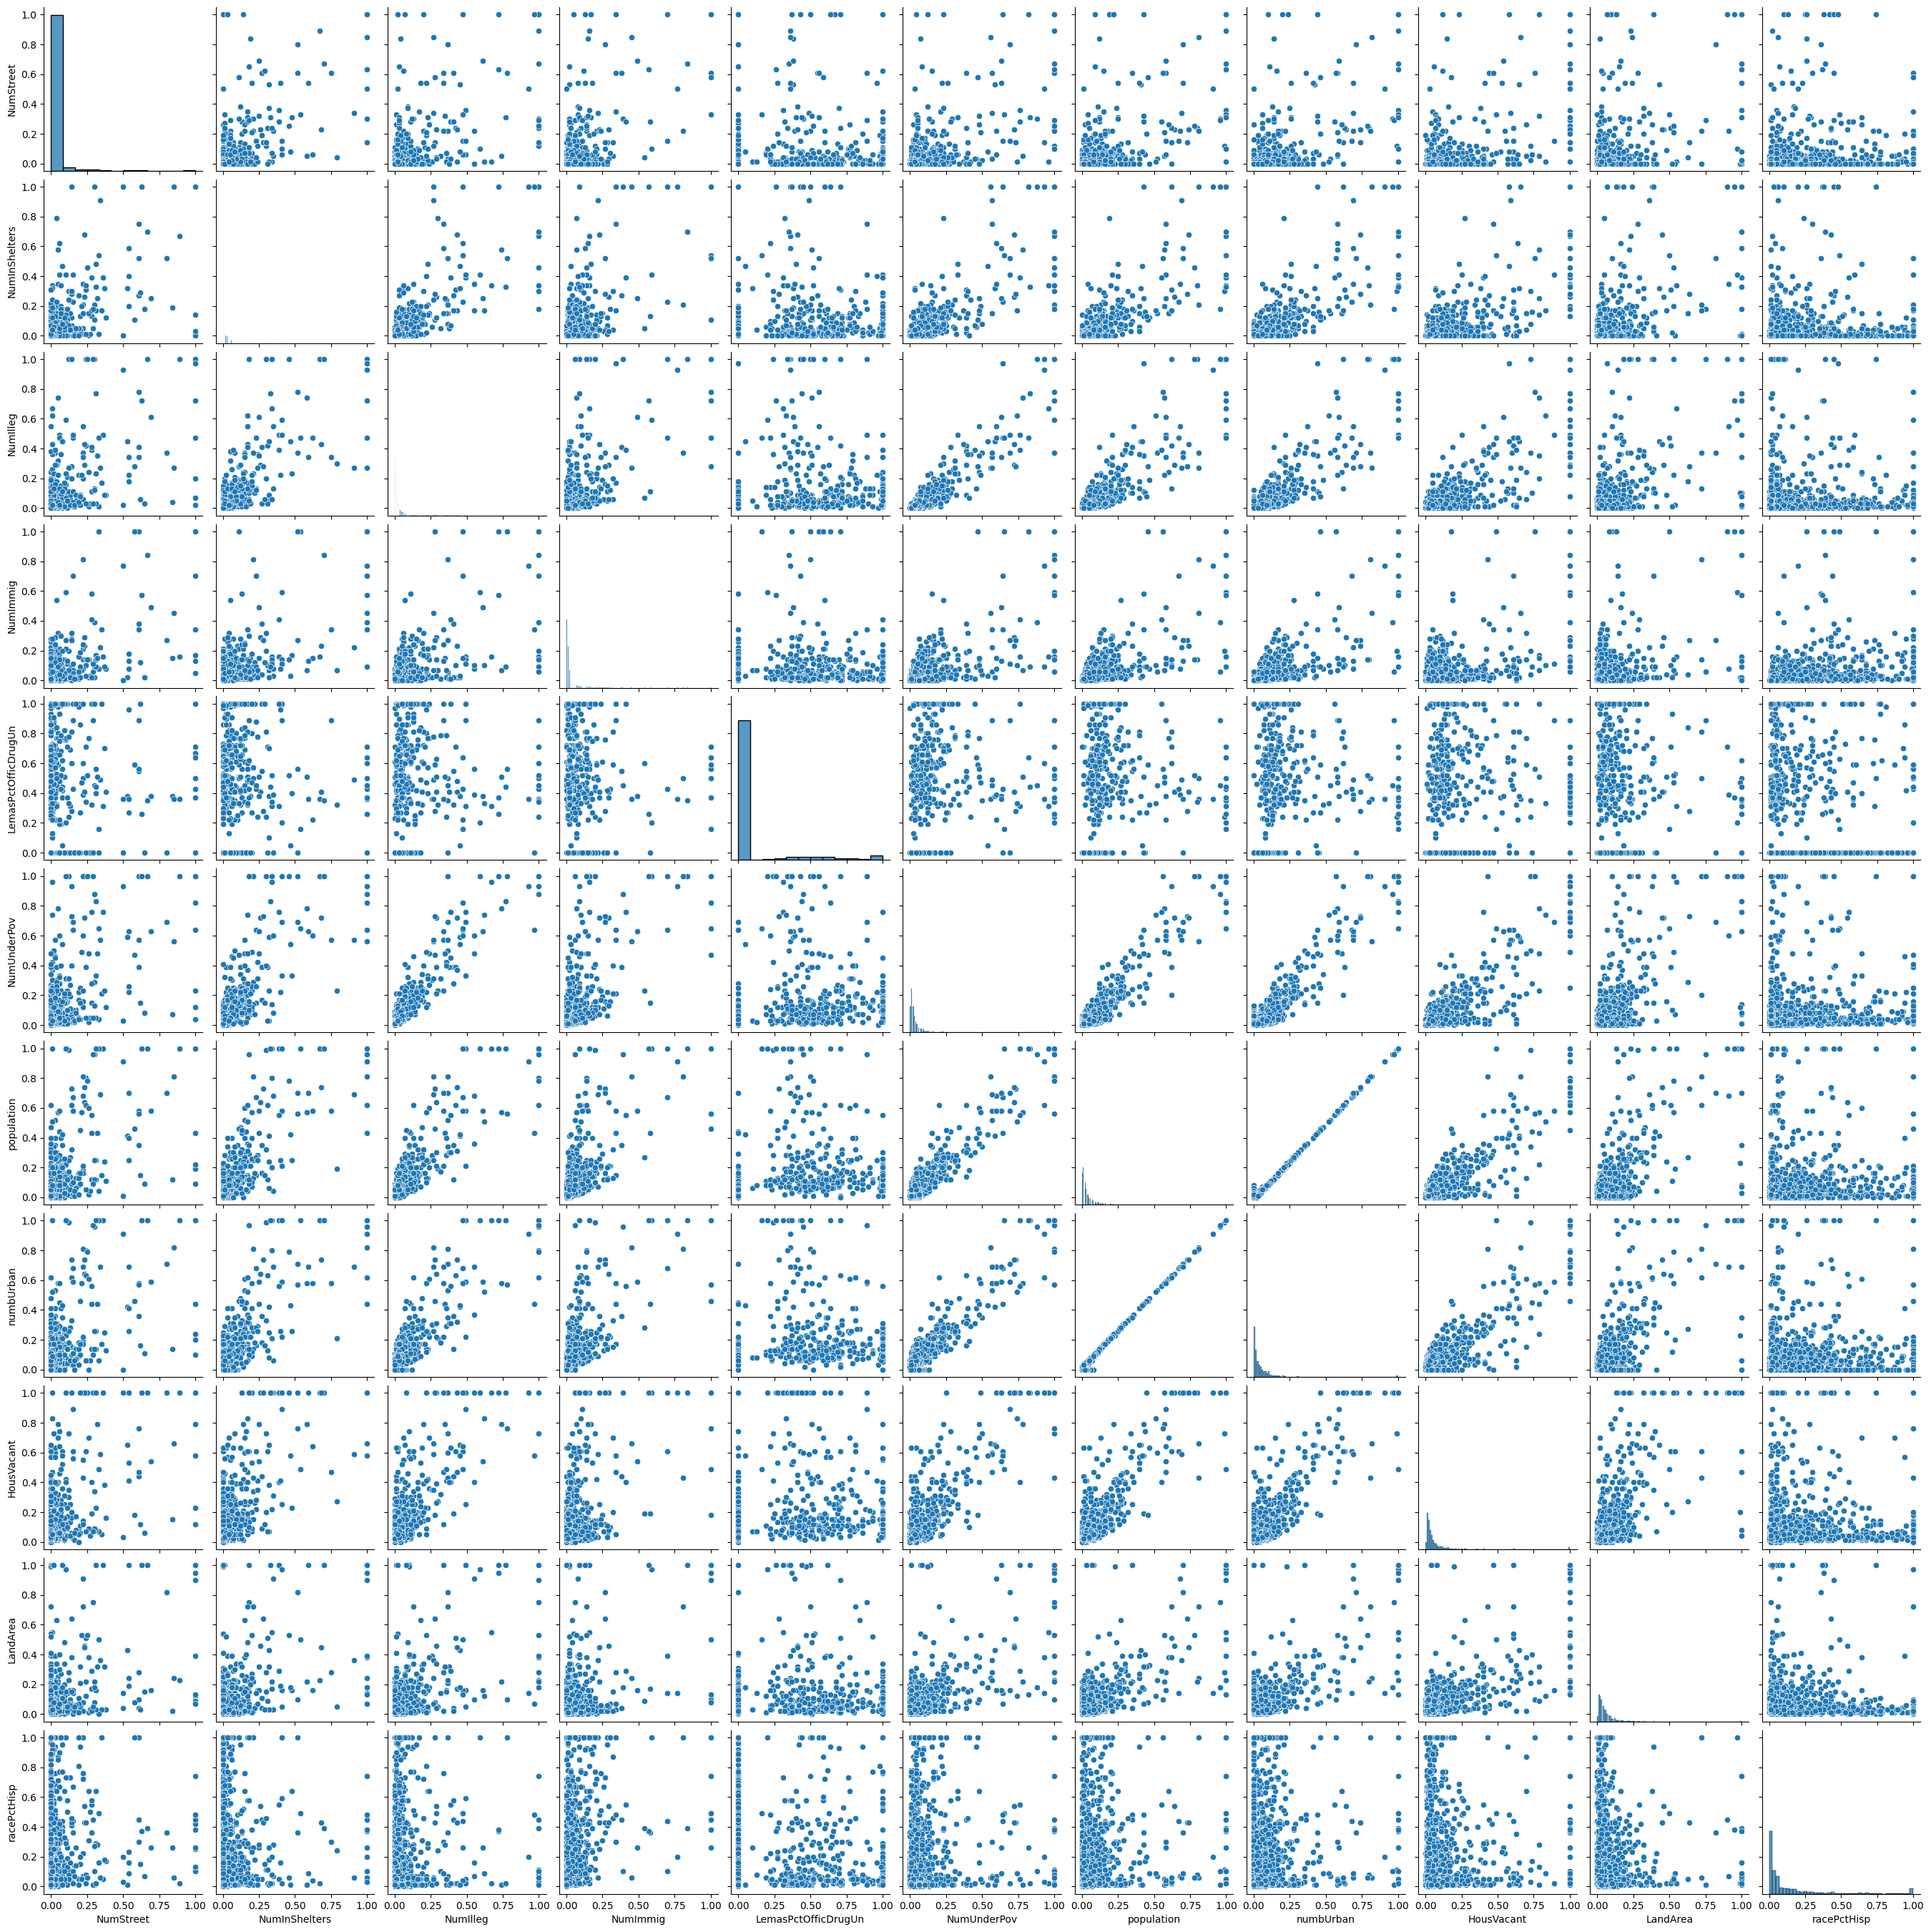

In [14]:
sb.pairplot(df_combined[list(top_CV.index)])

<Axes: >

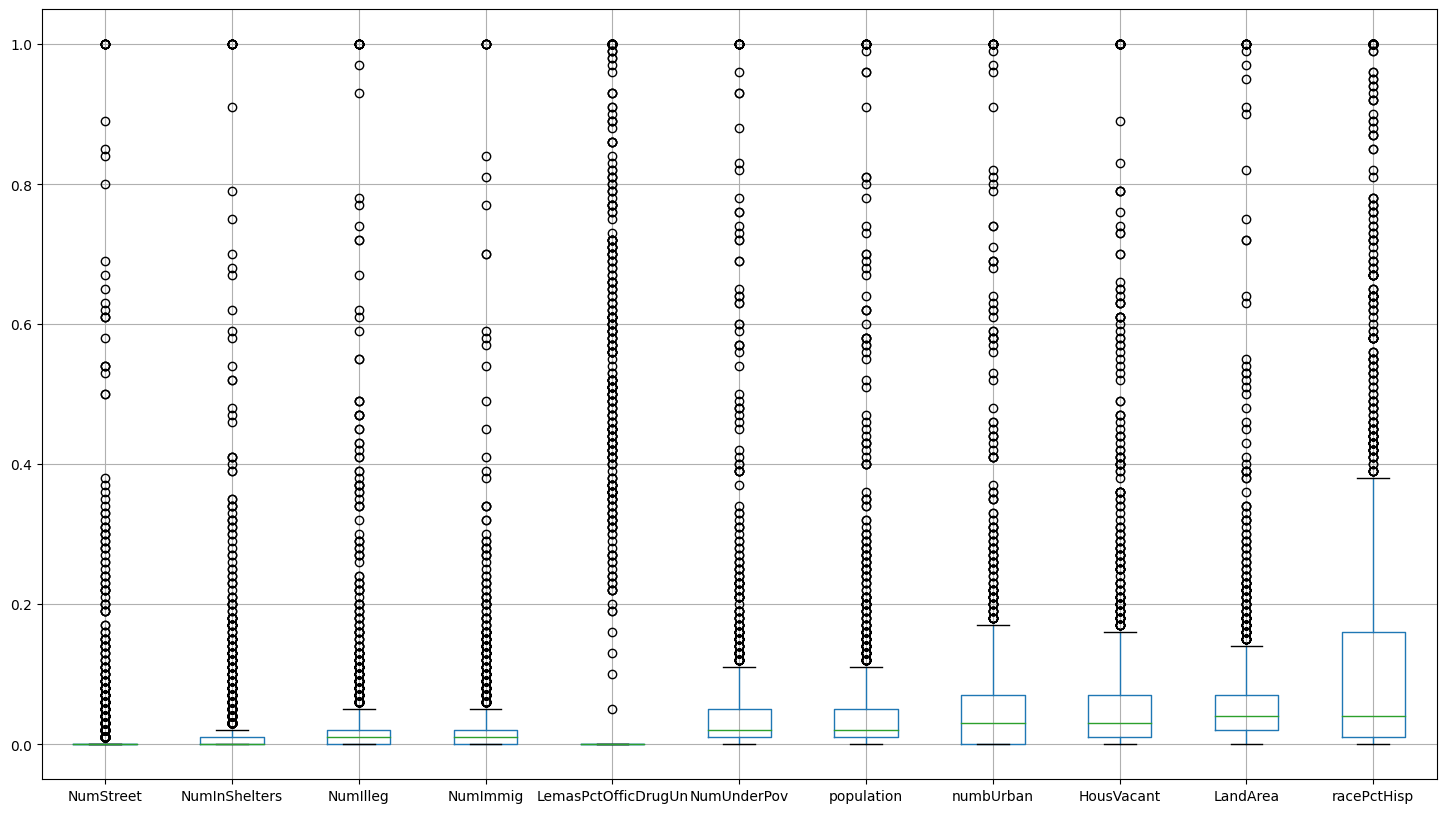

In [15]:
plt.figure(figsize=(18,10))
df_combined[list(top_CV.index)].boxplot()

#### Conclusions

From the scatterplot and boxplot above, I believe that the variables NumStreet and LemasPctOfficDrugUn have low coefficient of variation which means that they can be used to provide better esimates.<br> Although, as a concept, I believe that the scatterplots standalone aren't enough to draw out any conclusion for sure and we might need to check for more evidence to draw out any confirmed conclusion.

### (f) Fit a linear model

In [16]:
x_train = df_train.iloc[:, :-1]
y_train = df_train.iloc[:, -1:]
x_test = df_test.iloc[:, :-1]
y_test = df_test.iloc[:, -1:]

In [17]:
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train).fit()
# print(model.summary())

# testing mse
x_test = sm.add_constant(x_test)
y_pred = model.predict(x_test)
mse_test = round(mean_squared_error(y_test, y_pred), 5)

print("MSE Error: ", mse_test)

MSE Error:  0.01811


### (g) Fit a ridge regression model

In [18]:
model_ridge = RidgeCV(cv = KFold(n_splits = 5, random_state = 50, shuffle = True)).fit(x_train, y_train)
y_pred = model_ridge.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Chosen Lambda with Cross Validation: ", model_ridge.alpha_)
print("Test Error with Linear Regression using Ridge Regression: ", mse)

Chosen Lambda with Cross Validation:  1.0
Test Error with Linear Regression using Ridge Regression:  0.01772373712282779


### (h) Fit a LASSO model

In [19]:
def lasso_model(x_train, y_train, x_test, y_test, standardize_data = False):
    lasso_raw_variables = []
    if(standardize_data):
        scaled = StandardScaler()
        x_train = pd.DataFrame(scaled.fit_transform(x_train), columns=x_train.columns)
        x_test = pd.DataFrame(scaled.transform(x_test), columns=x_test.columns)
    
    model_lasso_raw = LassoCV(cv = KFold(n_splits = 5, random_state = 50, shuffle = True)).fit(x_train, y_train)
    y_pred = model_lasso_raw.predict(x_test)
    
    for i in range(len(model_lasso_raw.coef_)):
        if(model_lasso_raw.coef_[i] != 0):
            lasso_raw_variables.append([x_train.columns[i], model_lasso_raw.coef_[i]])
    lasso_raw_mse = mean_squared_error(y_test, y_pred)
    lasso_raw_lambda = model_lasso_raw.alpha_
    return lasso_raw_lambda, lasso_raw_mse, lasso_raw_variables

In [20]:
lasso_raw_lambda, lasso_raw_mse, lasso_raw_variables = lasso_model(x_train, y_train, x_test, y_test, standardize_data = False)
print("Best lambda for lassoCV is: ", lasso_raw_lambda)
print("Error for Lasso without normalizing data is : ", lasso_raw_mse)
print("Total number of best variables : ", len(lasso_raw_variables))
print("Best variables are :")
lasso_raw_variables

Best lambda for lassoCV is:  9.421060424823093e-05
Error for Lasso without normalizing data is :  0.01778029423811262
Total number of best variables :  78
Best variables are :


[['racepctblack', 0.2733956521512126],
 ['racePctAsian', -0.018675340792320035],
 ['agePct12t21', 0.07903300380532388],
 ['agePct12t29', -0.30005946369372016],
 ['agePct65up', 0.005874478335866907],
 ['pctUrban', 0.04121588729265738],
 ['pctWWage', -0.0962151648747516],
 ['pctWFarmSelf', 0.029991475226671508],
 ['pctWInvInc', -0.11446327312435661],
 ['pctWSocSec', 0.062482859679289154],
 ['pctWPubAsst', 0.04319686553289908],
 ['pctWRetire', -0.11028468782489494],
 ['whitePerCap', -0.07374673344489045],
 ['blackPerCap', -0.02311802269330326],
 ['indianPerCap', -0.032231597479407605],
 ['AsianPerCap', 0.02933063017739976],
 ['OtherPerCap', 0.02401951100117194],
 ['HispPerCap', 0.02622555791716118],
 ['PctPopUnderPov', -0.15368755744835264],
 ['PctLess9thGrade', -0.02230722500051158],
 ['PctBSorMore', 0.023939212283316344],
 ['PctEmploy', 0.16138079048997306],
 ['PctEmplManu', -0.020493090605291704],
 ['PctOccupManu', 0.018995480901955207],
 ['MalePctDivorce', 0.13794150863654148],
 ['Mal

In [21]:
lasso_scaled_lambda, lasso_scaled_mse, lasso_scaled_variables = lasso_model(x_train, y_train, x_test, y_test, standardize_data = True)
print("Best lambda for lassoCV is: ", lasso_scaled_lambda)
print("Error for Lasso without normalizing data is : ", lasso_scaled_mse)
print("Total number of best variables : ", len(lasso_scaled_variables))
print("Best variables are :")
lasso_scaled_variables

Best lambda for lassoCV is:  0.0007116541214377484
Error for Lasso without normalizing data is :  0.017824214871232473
Total number of best variables :  73
Best variables are :


[['racepctblack', 0.06858870925793555],
 ['racePctAsian', -0.0013606284767720403],
 ['agePct12t21', 0.011291618767082685],
 ['agePct12t29', -0.040221674567599605],
 ['pctUrban', 0.01680247304217818],
 ['pctWWage', -0.013003159360660519],
 ['pctWFarmSelf', 0.004377856493284333],
 ['pctWInvInc', -0.021216410951677665],
 ['pctWSocSec', 0.009385458078625222],
 ['pctWPubAsst', 0.006704066693141977],
 ['pctWRetire', -0.01750392150278845],
 ['whitePerCap', -0.009487391421876488],
 ['blackPerCap', -0.00375256795903095],
 ['indianPerCap', -0.005283808296876059],
 ['AsianPerCap', 0.005382140875924136],
 ['OtherPerCap', 0.003895211970265505],
 ['HispPerCap', 0.004205662721913295],
 ['PctPopUnderPov', -0.027938158086610373],
 ['PctLess9thGrade', -0.002534726164851423],
 ['PctEmploy', 0.02265654343113572],
 ['PctEmplManu', -0.0012749096237329935],
 ['MalePctDivorce', 0.019941068973786665],
 ['MalePctNevMarr', 0.022100135698349628],
 ['FemalePctDiv', -0.011719460251362092],
 ['PctKids2Par', -0.04003

There isn't a huge difference in the test MSEs between standardized or non-standardized data.<br>
Infact the error increases when we standardize the data before fitting the model.

### (i) Fit a PCR model

In [22]:
def components_count(x_train, y_train):
    scores_list = []
    for components in range(1, len(x_train.columns)+1):
        pcr = make_pipeline(PCA(n_components=components), LinearRegression(fit_intercept = True))
        each_score_cv = cross_val_score(pcr, x_train, y_train, cv = KFold(n_splits = 5, random_state = 50, shuffle = True), scoring = 'neg_mean_squared_error')
        scores_list.append(sum(abs(each_score_cv))/len(each_score_cv))
    m = np.argmin(scores_list) + 1
    return m, scores_list[m - 1]

m, mse = components_count(x_train, y_train)
print('M (# of principal components) chosen by cross-validation: ', m)
print("Train error with PCR and M ({}) is: {}".format(m, mse))

M (# of principal components) chosen by cross-validation:  94
Train error with PCR and M (94) is: 0.01945846041860312


In [23]:
def fit_PCR(m, x_train, y_train):
    model_pcr = make_pipeline(PCA(n_components=m), LinearRegression(fit_intercept = True))
    model_pcr.fit(x_train, y_train)
    y_pred = model_pcr.predict(x_test)
    mse = mean_squared_error(y_test,y_pred)
    return mse

mse = fit_PCR(m, x_train, y_train)
print("Test error with PCR and M ({}) is: {}".format(m, mse))

Test error with PCR and M (94) is: 0.018554909823387294


### (j) Fit a boosting tree

In [24]:
def choose_best_alpha(x_train, y_train):
    scores_list = []
    alphas = [i for i in range(0, 11)]
    for alpha in alphas:
        xgboost_regressor = XGBRegressor(reg_alpha = alpha, random_state = 50)
        each_score_cv = cross_val_score(xgboost_regressor, x_train, y_train, cv = KFold(n_splits = 5, random_state = 50, shuffle = True), scoring = 'neg_mean_squared_error')
        scores_list.append(sum(abs(each_score_cv))/len(each_score_cv))
    m = np.argmin(scores_list)
    return alphas[m], scores_list[m]
    
best_alpha, mse = choose_best_alpha(x_train, y_train)
print("Best Alpha after cross validation is: ", best_alpha)
print("MSE on train data after applying XGBoost with our selected best alpha is", mse)

Best Alpha after cross validation is:  2
MSE on train data after applying XGBoost with our selected best alpha is 0.020519332237738802


In [25]:
def xgbregressor_mse(best_alpha):
    model_xgboost_regressor = XGBRegressor(alpha = best_alpha, random_state = 50)
    model_xgboost_regressor.fit(x_train, y_train)
    y_pred = model_xgboost_regressor.predict(x_test)
    mse_xgbregressor = mean_squared_error(y_test, y_pred)
    return mse_xgbregressor

mse_xgbregressor = xgbregressor_mse(best_alpha)
print("MSE on test data after applying XGBoost with our selected best alpha is", mse_xgbregressor)

MSE on test data after applying XGBoost with our selected best alpha is 0.017957844975082893
